# Focusing light with a lens

In this example, we will analyze how light is focused using a lens. We will use several algorithms.
From an ondulatory point of view, a lens as a transmittance object

$t(\xi,\eta)=P(\xi,\eta)\exp\left[-ik\frac{\left(\xi^{2}+\eta^{2}\right)}{2f'}\right]$ 

where $P(\xi,\eta)$ is the shape of the lens, $k=2\pi/\lambda$ and f' is the focal distance of the lens.

## Lens in x mode

In [45]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_optics import beam_width_1D, FWHM1D, MTF_ideal, MTF_parameters

In [46]:
focal = 25 * mm
diameter = 4 * mm

# Initial parameters
x0 = np.linspace(-diameter / 2 - 50 * um, diameter / 2 + 50 * um, 1024 * 32)
wavelength = 0.6238 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, focal=focal, radius=diameter / 2)

In [47]:
u1 = t0 * u0
u2 = u1.RS(z=focal, verbose=False)

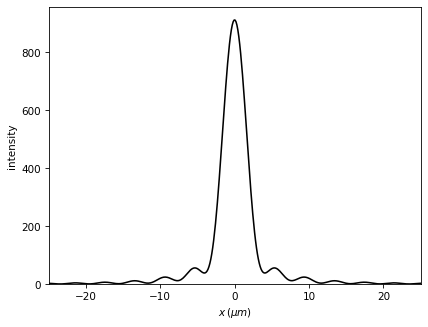

In [48]:
u2.draw()
plt.xlim(-25, 25)

### Beam width computation

In [49]:
width, center = beam_width_1D(u2.u, u2.x)

114.7443487601409 3.610817918990506


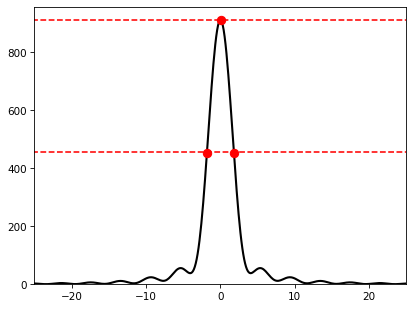

In [50]:
fwhm = FWHM1D(u2.x, np.abs(u2.u) ** 2, has_draw=True, percentage=0.5)
plt.xlim(-25, 25)
plt.ylim(bottom=0)
print(width, fwhm)

### MTF

frquency = 256.49 lines/mm


<>:16: SyntaxWarning: invalid escape sequence '\,'
<>:16: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_72254/3601478357.py:16: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel("$f_x\,(mm^{-1})$", fontsize=18)


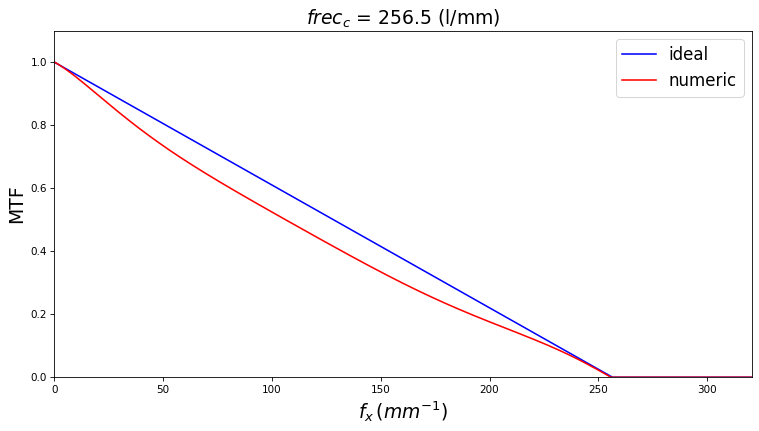

In [51]:
freq_real, mtf_norm = u2.MTF(has_draw=False)

freq_ideal = np.linspace(0, 350, 600)
mtf_ideal, freq_corte = MTF_ideal(
    freq_ideal,
    wavelength=wavelength,
    diameter=diameter,
    focal=focal,
    kind="1D",
    has_draw=False,
    verbose=True,
)

plt.figure(figsize=(12, 6))
plt.plot(freq_ideal, mtf_ideal, "b", label="ideal")
plt.xlabel("$f_x\,(mm^{-1})$", fontsize=18)
plt.ylabel("MTF", fontsize=18)
plt.xlim(left=0, right=1.25 * freq_corte)
plt.ylim(bottom=0, top=1.1)
plt.title("$frec_c$ = {:2.1f} (l/mm)".format(freq_corte), fontsize=18)

plt.plot(freq_real, mtf_norm, "r", label="numeric")

plt.legend(fontsize=16)

### Several rays

In [52]:
# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_waves_several_inclined(A=1, num_beams=7, max_angle=10 * degrees)

In [53]:
us1 = t0 * u0
us2 = us1.RS(z=focal, verbose=False)

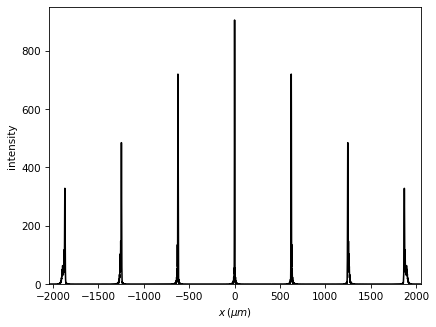

In [54]:
us2.draw()

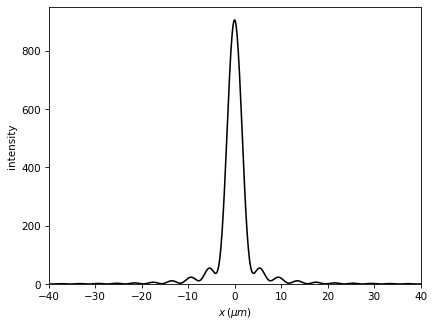

In [55]:
us2.draw()
plt.xlim(-40, 40)

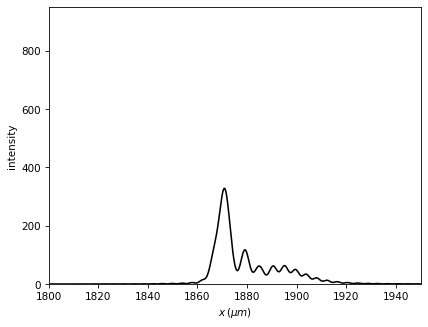

In [56]:
us2.draw()
plt.xlim(1800, 1950)

### Binary Fresnel lens

With the modules diffractio.scalar_sources_X, scalar_fields_X and scalar_masks_X for propagating a field generated by a scalar light only the propagation to a given distances is performed. If you need to visualize the z propagation it is better the use of `diffractio.scalar_fields_XZ`, since it performs a for loop over a number of distances given by a linspace array. This for loop is executed, when possible, using multiprocessing, since there is not computational interaction between different locations z. 

In [57]:
# initial data
x0 = np.linspace(-750 * um, 750 * um, 1024 * 32)
wavelength = 0.6238 * um
focal = 20 * mm
radius = 250 * um

# definition of source
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

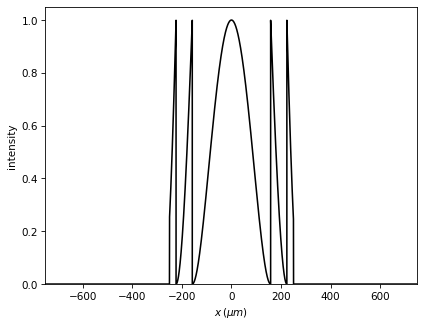

In [58]:
# definition of mask
t0 = Scalar_mask_X(x0, wavelength)
t0.fresnel_lens(x0=0 * um, radius=radius, focal=focal, kind="amplitude", phase=np.pi)
t0.draw(kind="intensity")

In [59]:
u1 = t0.RS(z=20 * mm)

Good result: factor 179.85


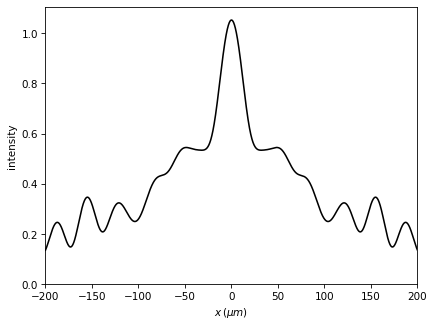

In [60]:
u1.draw(logarithm=1, normalize="intensity")
plt.xlim(-200, 200)

## XZ lens: CZT scheme

In [61]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [62]:
focal = 15 * mm
diameter = 4 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter / 2, focal=focal)

u1 = u0 * t0

In [63]:
z0 = np.linspace(14.8 * mm, 15.2 * mm, 512)

This procedure is deprecated. It is more ineficient than with CZT algorithm.

It requires plt.xlim(-20,20) after drawing. The drawing is badly sampled.


In [64]:
%%time
u2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2.incident_field(u1)
u2.RS(num_processors=1);

CPU times: user 178 ms, sys: 57.3 ms, total: 235 ms
Wall time: 170 ms


In [65]:
%%time
xout=np.linspace(-20,20,256)
u2 = u1.CZT(z=z0, xout=xout)

CPU times: user 285 ms, sys: 998 μs, total: 286 ms
Wall time: 286 ms


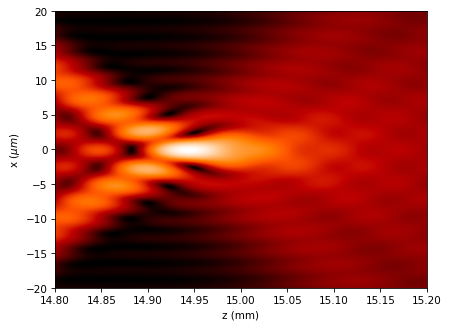

In [66]:
u2.draw(logarithm=1e-1, z_scale="mm")

In [67]:
x_f, z_f = u2.search_focus()

x = -0.078 um, z = 14944.031 um


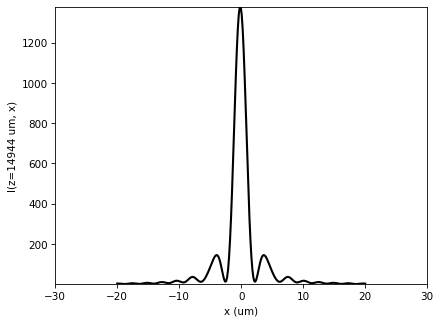

In [68]:
u2.profile_transversal(z0=z_f)
plt.xlim(-30, 30)

### XZ lens: BPM scheme

951.2850019179132


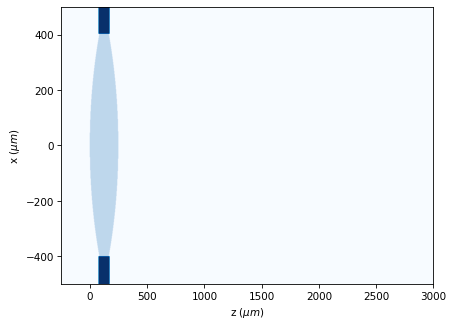

In [69]:
focal = 1 * mm
diameter = 1 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024 * 4)
z0 = np.linspace(-250 * um, focal + 2 * mm, 1024)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens(
    r0=(0 * um, 0 * um),
    size=diameter / 1.25,
    radii=(1 * mm, -1 * mm),
    thickness=0.25 * mm,
    refractive_index=1.55,
    angle=0 * degrees,
    mask=(100 * um, 3 + 0.1j),
)
print(focal)
u1.draw_refractive_index()
u1.surface_detection()
edge_matrix = u1.borders

u1.smooth_refractive_index(type_filter=2, pixels_filtering=50)
u1.borders = edge_matrix

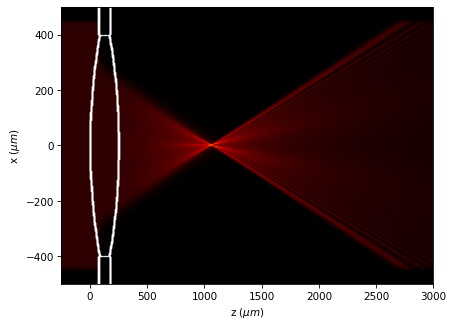

In [70]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize="maximum", draw_borders=True, edge_matrix=edge_matrix)

In [71]:
x_focus, z_focus = u1.search_focus()

x = -0.122 um, z = 1062.072 um


In [72]:
width, z_center = u1.beam_widths(kind="sigma4", has_draw=(0, 0))

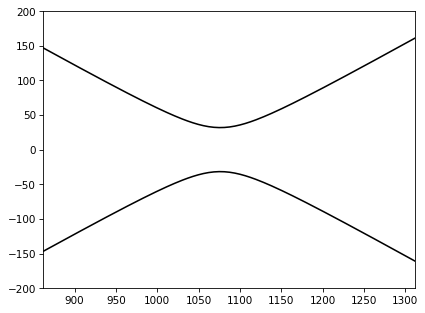

In [73]:
plt.plot(u1.z, width, "k")
plt.plot(u1.z, -width, "k")
plt.xlim(z_focus - 200 * um, z_focus + 250 * um)
plt.ylim(-200, 200)

## Effect of rotation

In [74]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 2)
z0 = np.linspace(-50 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

<string>:1: RuntimeWarning: invalid value encountered in sqrt


208.33333333333331


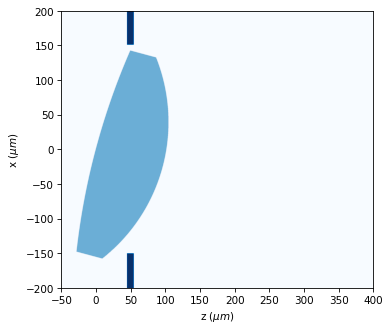

In [75]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens(
    r0=(0 * um, 0 * um),
    size=300 * um,
    radii=(1000 * um, -250 * um),
    thickness=100 * um,
    refractive_index=2,
    angle=15 * degrees,
    mask=(10 * um, 3 + 0.05j),
)
print(focal)
u1.surface_detection()
u1.draw_refractive_index(scale="scaled")
edge_matrix = u1.borders

u1.smooth_refractive_index(pixels_filtering=25, type_filter=2)

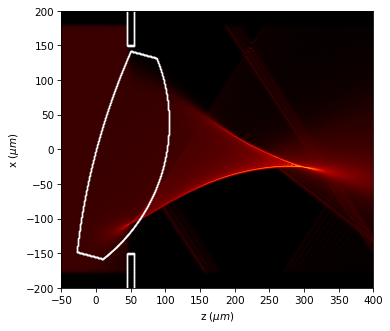

In [76]:
u1.BPM(has_edges=True, verbose=False)
u1.draw(
    logarithm=True,
    normalize="maximum",
    draw_borders=True,
    scale="scaled",
    edge_matrix=edge_matrix,
)

Here we see how several rays converge

In [77]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 1)
z0 = np.linspace(-25 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beams_several_parallel(
    A=1, num_beams=15, w0=5, z0=10, x_central=0.0, x_range=300.0, theta=0.0
)

208.33333333333331


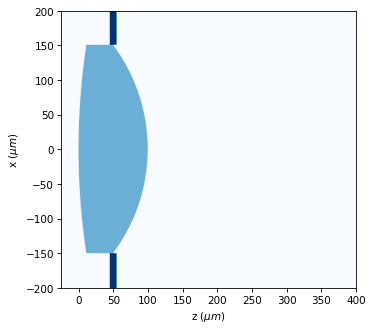

In [78]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens(
    r0=(0 * um, 0 * um),
    size=300 * um,
    radii=(1000 * um, -250 * um),
    thickness=100 * um,
    refractive_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j),
)
print(focal)
u1.surface_detection()
u1.draw_refractive_index(scale="scaled")
edge_matrix = u1.borders

u1.smooth_refractive_index(pixels_filtering=25, type_filter=2)

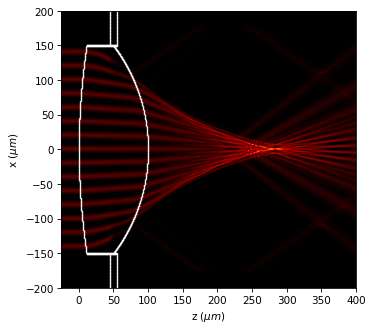

In [79]:
u1.BPM(verbose=False)
u1.draw(
    logarithm=True,
    normalize="maximum",
    draw_borders=True,
    scale="scaled",
    edge_matrix=edge_matrix
)

### XY scheme

In [80]:
from diffractio import mm, plt, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [81]:
diameter = 2 * mm
focal = 25 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

In [82]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter / 2, diameter / 2), focal=(focal, focal))

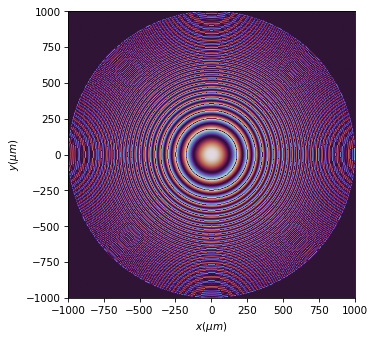

In [92]:
t0.draw("phase", percentage_intensity=0.01)

In [84]:
u1 = u0 * t0

In [85]:
u2 = u1.RS(z=focal)

In [86]:
u2.cut_resample(
    x_limits=(-20, 20),
    y_limits=(-20, 20),
    num_points=(1024, 1024),
    new_field=False,
    interp_kind=(3, 1),
)

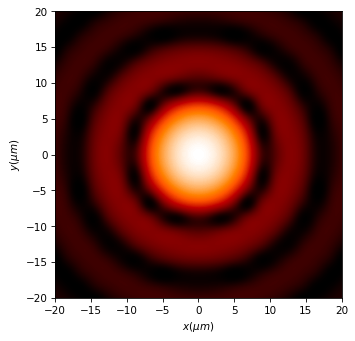

In [87]:
u2.draw(logarithm=1e-2)

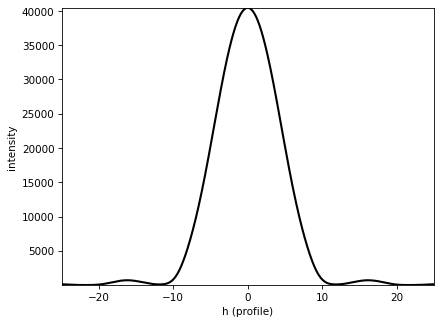

In [88]:
u2.draw_profile(
    point1=(-25, 0), point2=(25, 0), npixels=2048, kind="intensity", order=2
)

In [89]:
def intensity_area(u, r0, radius, power=1, has_draw=True):
    intensities = np.zeros_like(radius)
    mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

    for i, r in enumerate(radius):
        mask.circle(r0=r0, radius=(r, r), angle=0)
        masked_field = u * mask
        intensities[i] = masked_field.intensity().sum() ** power

    intensities = intensities / intensities.max()
    if has_draw is True:
        plt.figure()
        plt.plot(rs, intensities)
        plt.ylim(bottom=0)
        plt.xlim(left=0, right=rs[-1])
    return intensities

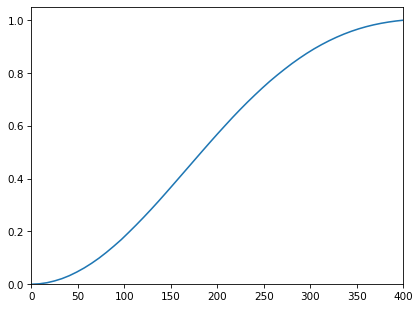

In [90]:
rs = np.linspace(1 * um, 400 * um, 51)
intensities = intensity_area(u2, r0=(0 * um, 0 * um), radius=rs, power=1)

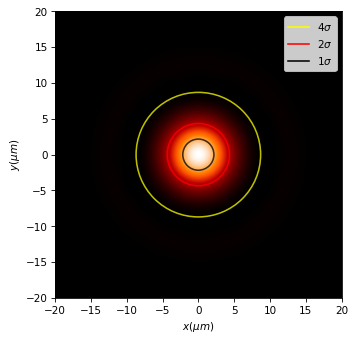

In [91]:
u2.beam_width_4s(has_draw=True)